In [ ]:
# Célula 1: Imports e Configurações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para mostrar todas as colunas (muito útil em datasets largos)
pd.set_option('display.max_columns', None)

# Estilo dos gráficos
sns.set_theme(style="whitegrid")

In [ ]:
# Célula 2: Carga dos Dados
df_raw = pd.read_csv('../data/raw/telco_churn.csv')

# Exibir as primeiras 5 linhas para ver a "cara" dos dados
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Célula 3: Informações Técnicas
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [4]:
# Célula 4: Tratamento de Tipos de Dados
# O errors='coerce' vai transformar os textos vazios em NaN
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')

# Vamos ver quantos viraram NaN?
print(f"Quantidade de nulos após conversão: {df_raw['TotalCharges'].isnull().sum()}")

Quantidade de nulos após conversão: 11


In [5]:
# Célula 5: Padronização de Colunas
df_raw.columns = df_raw.columns.str.lower()

# Verificar o resultado final
df_raw.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_raw[df_raw['totalcharges'].isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
# Célula 6: Tratamento de Nulos (Regra de Negócio: Cliente novo = total 0)
df_raw['totalcharges'] = df_raw['totalcharges'].fillna(0)

# Verificação final
print(f"Nulos restantes: {df_raw['totalcharges'].isnull().sum()}")

Nulos restantes: 0


churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


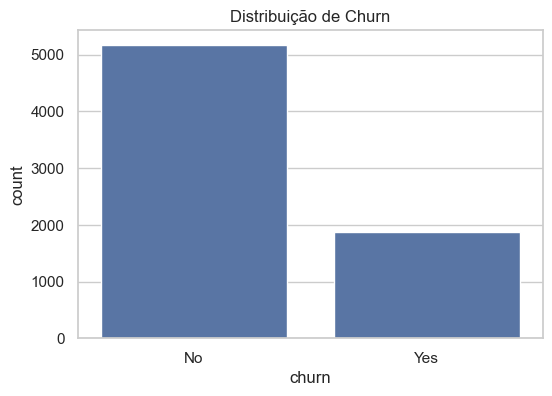

In [8]:
# Célula 7: Analisando o Target
# normalize=True traz a proporção (porcentagem) em vez da contagem absoluta
print(df_raw['churn'].value_counts(normalize=True))

# Vamos visualizar isso também?
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_raw)
plt.title('Distribuição de Churn')
plt.show()

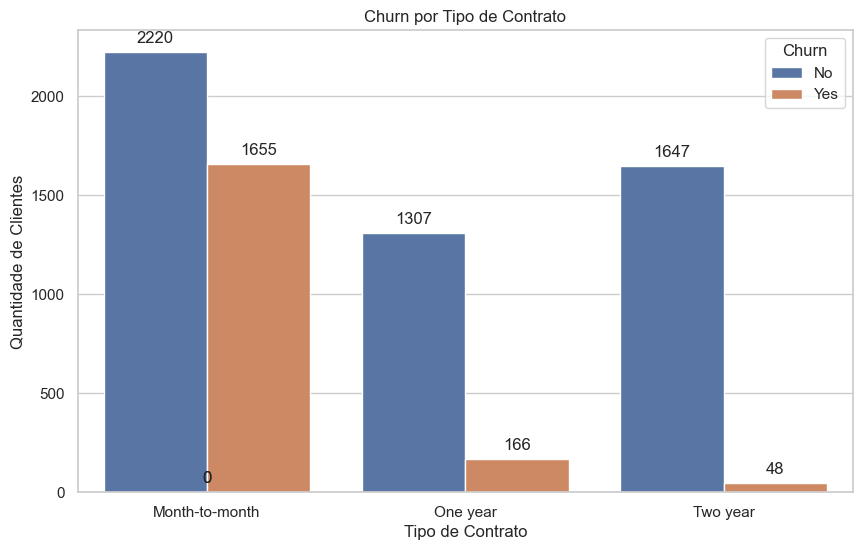

In [9]:
# Célula 8: Análise de Churn por Tipo de Contrato
plt.figure(figsize=(10, 6))

# O countplot conta as ocorrências
ax = sns.countplot(x='contract', hue='churn', data=df_raw)

plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

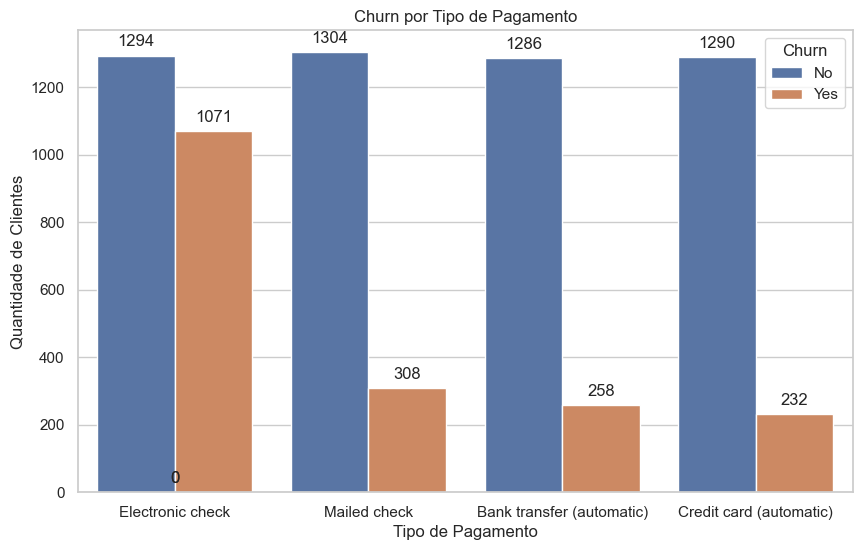

In [ ]:
# Célula 8: Análise de Churn por Tipo de Pagamento
plt.figure(figsize=(10, 6))

# O countplot conta as ocorrências
ax = sns.countplot(x='paymentmethod', hue='churn', data=df_raw)

plt.title('Churn por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

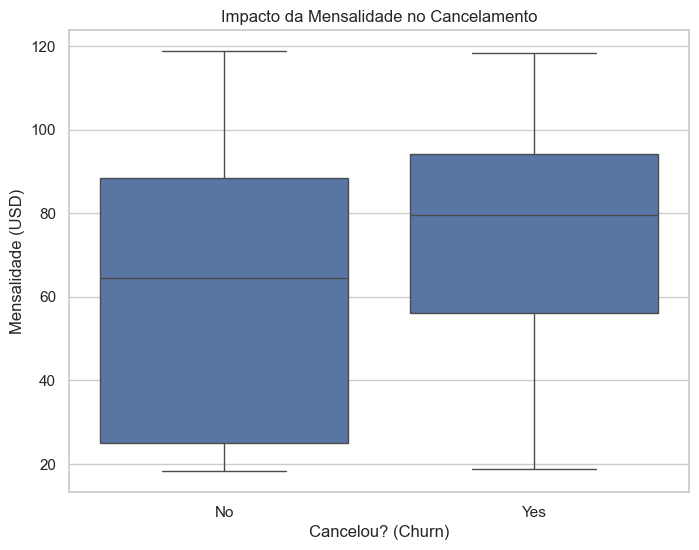

In [12]:
# Célula 10: Distribuição de Cobrança Mensal por Churn
plt.figure(figsize=(8, 6))

sns.boxplot(x='churn', y='monthlycharges', data=df_raw)

plt.title('Impacto da Mensalidade no Cancelamento')
plt.xlabel('Cancelou? (Churn)')
plt.ylabel('Mensalidade (USD)')
plt.show()

In [13]:
# Célula 11: Transformação Binária do Target
# Mapeando: Yes -> 1, No -> 0
df_raw['churn_bin'] = df_raw['churn'].map({'Yes': 1, 'No': 0})

# Verificando se funcionou
df_raw[['churn', 'churn_bin']].head()

,churn,churn_bin
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


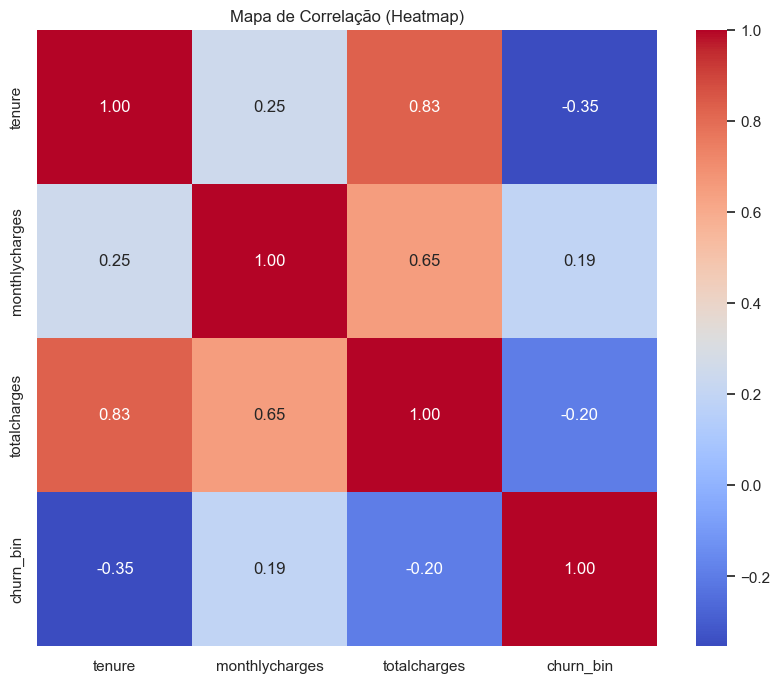

In [14]:
# Célula 12: Matriz de Correlação
# Vamos pegar apenas as colunas numéricas para a correlação
colunas_numericas = ['tenure', 'monthlycharges', 'totalcharges', 'churn_bin']

plt.figure(figsize=(10, 8))
sns.heatmap(df_raw[colunas_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação (Heatmap)')
plt.show()

In [16]:
# Célula 13: Feature Engineering - Encoding Definitivo
df_final = df_raw.copy()

# 1. Label Encoding: Para colunas estritamente binárias (Sim/Não ou M/F)
binary_cols = ['gender', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']

for col in binary_cols:
    df_final[col] = pd.factorize(df_final[col])[0]

# 2. One-Hot Encoding: Para colunas com mais de 2 categorias
multi_cols = ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 
              'deviceprotection', 'techsupport', 'streamingtv', 
              'streamingmovies', 'contract', 'paymentmethod']

# dtype=int -> Garante que saia 0 e 1, não True e False
df_final = pd.get_dummies(df_final, columns=multi_cols, drop_first=True, dtype=int)

# 3. Limpeza final
# Removemos customerid (inútil p/ modelo) e churn (pois já temos churn_bin)
df_final = df_final.drop(columns=['customerid', 'churn'])

# Verificação Final
print("Shape do dataset:", df_final.shape)
df_final.head()

Shape do dataset: (7043, 31)


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn_bin,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,34,1,1,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,1,0,2,1,0,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,45,0,1,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,2,1,0,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
# Célula 14: Divisão dos Dados
from sklearn.model_selection import train_test_split

# X = Tudo menos o Churn | y = Apenas o Churn
X = df_final.drop('churn_bin', axis=1)
y = df_final['churn_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

Treino: 5634 amostras
Teste: 1409 amostras


In [18]:
# Célula 15: Treinamento do Modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instanciando o modelo com 'balanced' para lidar com o desequilíbrio
rf_model = RandomForestClassifier(n_estimators=100, 
                                  random_state=42, 
                                  class_weight='balanced',
                                  max_depth=10) # Evita que a árvore cresça demais e decore o treino

# Treinando
rf_model.fit(X_train, y_train)

# Fazendo previsões nos dados de Teste
y_pred = rf_model.predict(X_test)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409


--- Matriz de Confusão ---


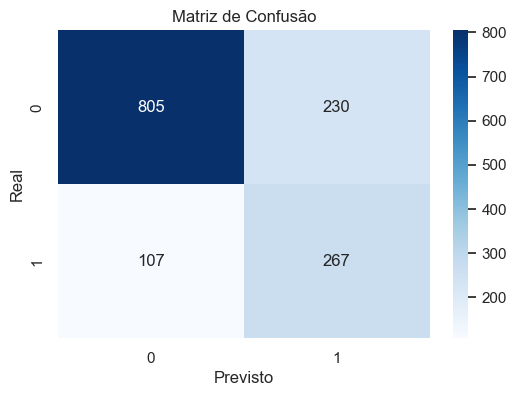

In [19]:
# Célula 16: Métricas de Avaliação
print("--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

print("\n--- Matriz de Confusão ---")
# Visualizando os acertos e erros
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_14556\965151538.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')


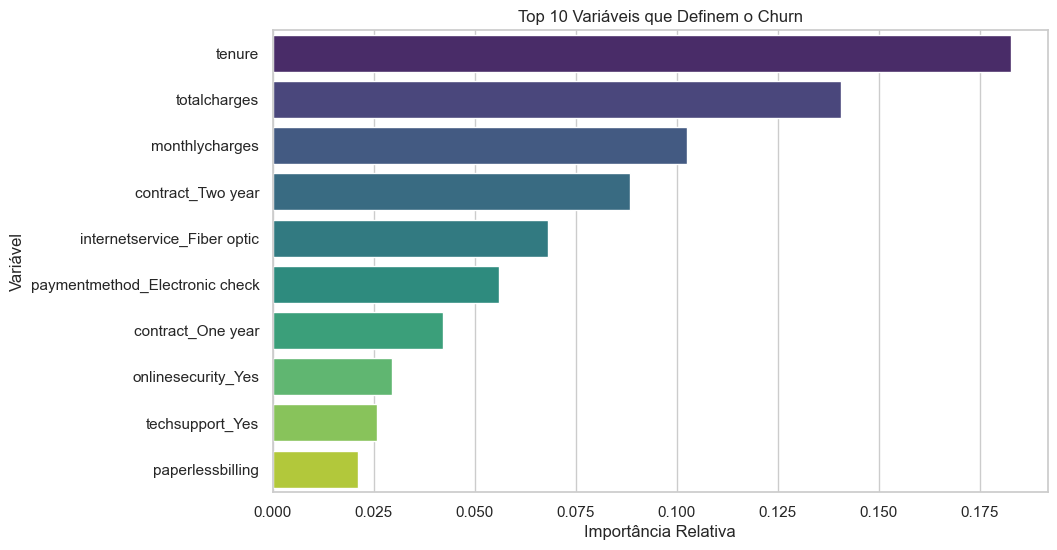

                        Feature  Importance
4                        tenure    0.182650
8                  totalcharges    0.140644
7                monthlycharges    0.102534
26            contract_Two year    0.088350
11  internetservice_Fiber optic    0.068167


In [20]:
# Célula 17: Feature Importance (O "Porquê")
import pandas as pd

# Extraindo a importância
importances = rf_model.feature_importances_
feature_names = X.columns

# Criando um DataFrame para facilitar a visualização
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizando as Top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')
plt.title('Top 10 Variáveis que Definem o Churn')
plt.xlabel('Importância Relativa')
plt.ylabel('Variável')
plt.show()

# Imprimir as Top 5 em texto
print(feature_imp_df.head(5))